<a href="https://colab.research.google.com/github/StanleyNyadzayo/eee408labs/blob/main/Tutorial_Comparing_Multiple_ML_Models_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prerequisite: Completed Project 1 (Titanic) baseline with Logistic Regression - Done

Learning Objectives

*   Understand when to use different classification algorithms

*   Train and compare 4 models: Logistic Regression, Random Forest, Decision Tree, SVM


*   Evaluate which model performs best on Titanic survival prediction
*   Understand trade-offs between model complexity and performance


*   Visualize model comparisons effectively

In [6]:
# Using Titanic Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

# Data preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Select features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

print("Data prepared successfully!")
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")

Data prepared successfully!
Features: 9, Samples: 891


Step 2: Split Data and Scale Features
Important: SVC requires feature scaling, so let's scale for all models to ensure fair comparison.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for SVC!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 712 samples
Test set: 179 samples


Step 3: Import All Models

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)

print("Models and metrics imported!")

Models and metrics imported!


Step 4: Train All Models
Create a dictionary to store models for easy iteration.

In [13]:
# Initialize models with reasonable hyperparameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'SVC': SVC(kernel='rbf', random_state=42, probability=True)
}

# Dictionary to store results
results = {}

# Train each model
print("Training models...\n")
for name, model in models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'predictions': y_pred
    }

    print(f"Accuracy: {accuracy:.3f} ({accuracy:.2%}), F1-Score: {f1:.3f} ({f1:.2%})\n")

print("All models trained successfully!")

Training models...

Training Logistic Regression...
Accuracy: 0.804 (80.45%), F1-Score: 0.724 (72.44%)

Training Random Forest...
Accuracy: 0.810 (81.01%), F1-Score: 0.742 (74.24%)

Training Decision Tree...
Accuracy: 0.760 (75.98%), F1-Score: 0.650 (65.04%)

Training SVC...
Accuracy: 0.804 (80.45%), F1-Score: 0.711 (71.07%)

All models trained successfully!


Step 5: Create Comparison Table

In [17]:
# Create results DataFrame for easy comparison
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'F1-Score': [results[model]['f1_score'] for model in results.keys()],
    'Precision': [results[model]['precision'] for model in results.keys()],
    'Recall': [results[model]['recall'] for model in results.keys()]
})

# Sort by F1-Score (best metric for slightly imbalanced data)
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("=" * 70)
print("MODEL COMPARISON RESULTS")
print("=" * 70)
# Format metrics as percentages for display
results_df_display = results_df.copy()
for col in ['Accuracy', 'F1-Score', 'Precision', 'Recall']:
    results_df_display[col] = results_df_display[col].apply(lambda x: f"{x:.2%}")

print(results_df_display.to_string(index=False))
print("=" * 70)

MODEL COMPARISON RESULTS
              Model Accuracy F1-Score Precision Recall
      Random Forest   81.01%   74.24%    77.78% 71.01%
Logistic Regression   80.45%   72.44%    79.31% 66.67%
                SVC   80.45%   71.07%    82.69% 62.32%
      Decision Tree   75.98%   65.04%    74.07% 57.97%


Step 6: Visualize Model Comparison
Visualization 1: Bar Chart Comparison

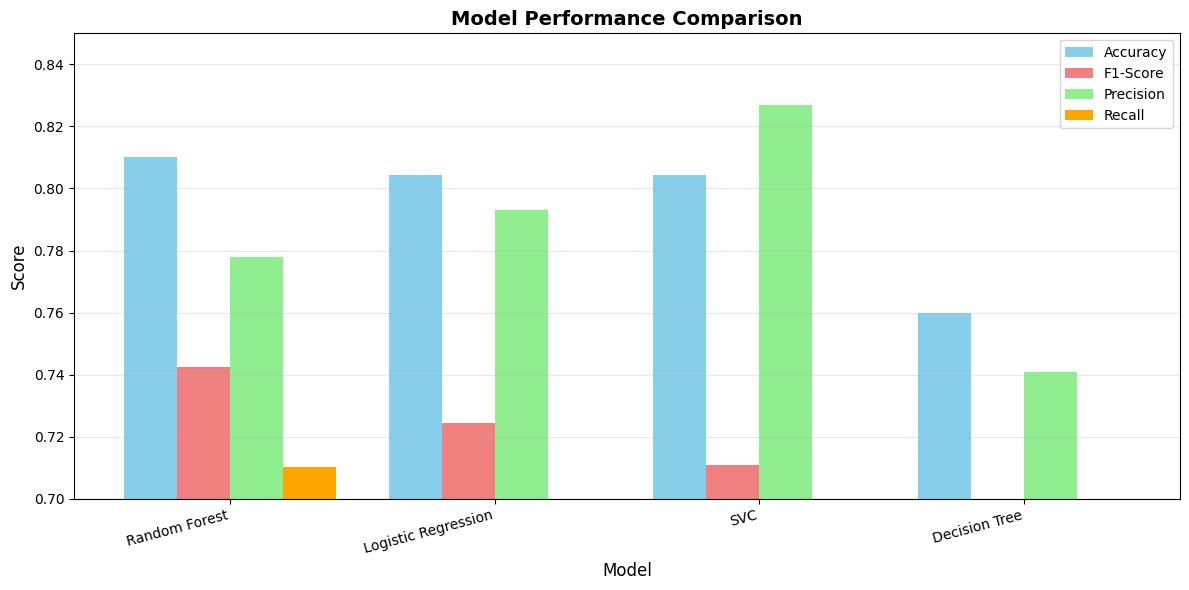

In [18]:
# Bar chart of metrics
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(results_df))
width = 0.2

ax.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', color='skyblue')
ax.bar(x - 0.5*width, results_df['F1-Score'], width, label='F1-Score', color='lightcoral')
ax.bar(x + 0.5*width, results_df['Precision'], width, label='Precision', color='lightgreen')
ax.bar(x + 1.5*width, results_df['Recall'], width, label='Recall', color='orange')

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0.7, 0.85)

plt.tight_layout()
plt.show()

Random Forest appears to be the best-performing model among the four, showing the highest F1-Score (74.24%), which is a good indicator for imbalanced datasets like this one. It also has the highest accuracy (81.01%) and precision (77.78%), and a strong recall (71.01%).
Logistic Regression and SVC have the same accuracy (80.45%). Logistic Regression has a slightly better F1-Score (72.44%) and recall (66.67%) compared to SVC's F1-Score (71.07%) and recall (62.32%). However, SVC has the highest precision (82.69%). This suggests that while SVC is good at not predicting a survival when the passenger didn't survive (high precision), it misses more actual survivors (lower recall) compared to Logistic Regression.
Decision Tree performed the worst across all metrics, with the lowest accuracy (75.98%), F1-Score (65.04%), precision (74.07%), and recall (57.97%). This might indicate that the chosen max_depth=5 hyperparameter is too restrictive for this dataset, or that a single decision tree is not powerful enough compared to ensemble methods like Random Forest.
In summary, Random Forest seems to be the most balanced and best-performing model for predicting survival on the Titanic dataset based on these metrics.

Visualization 2: Confusion Matrices

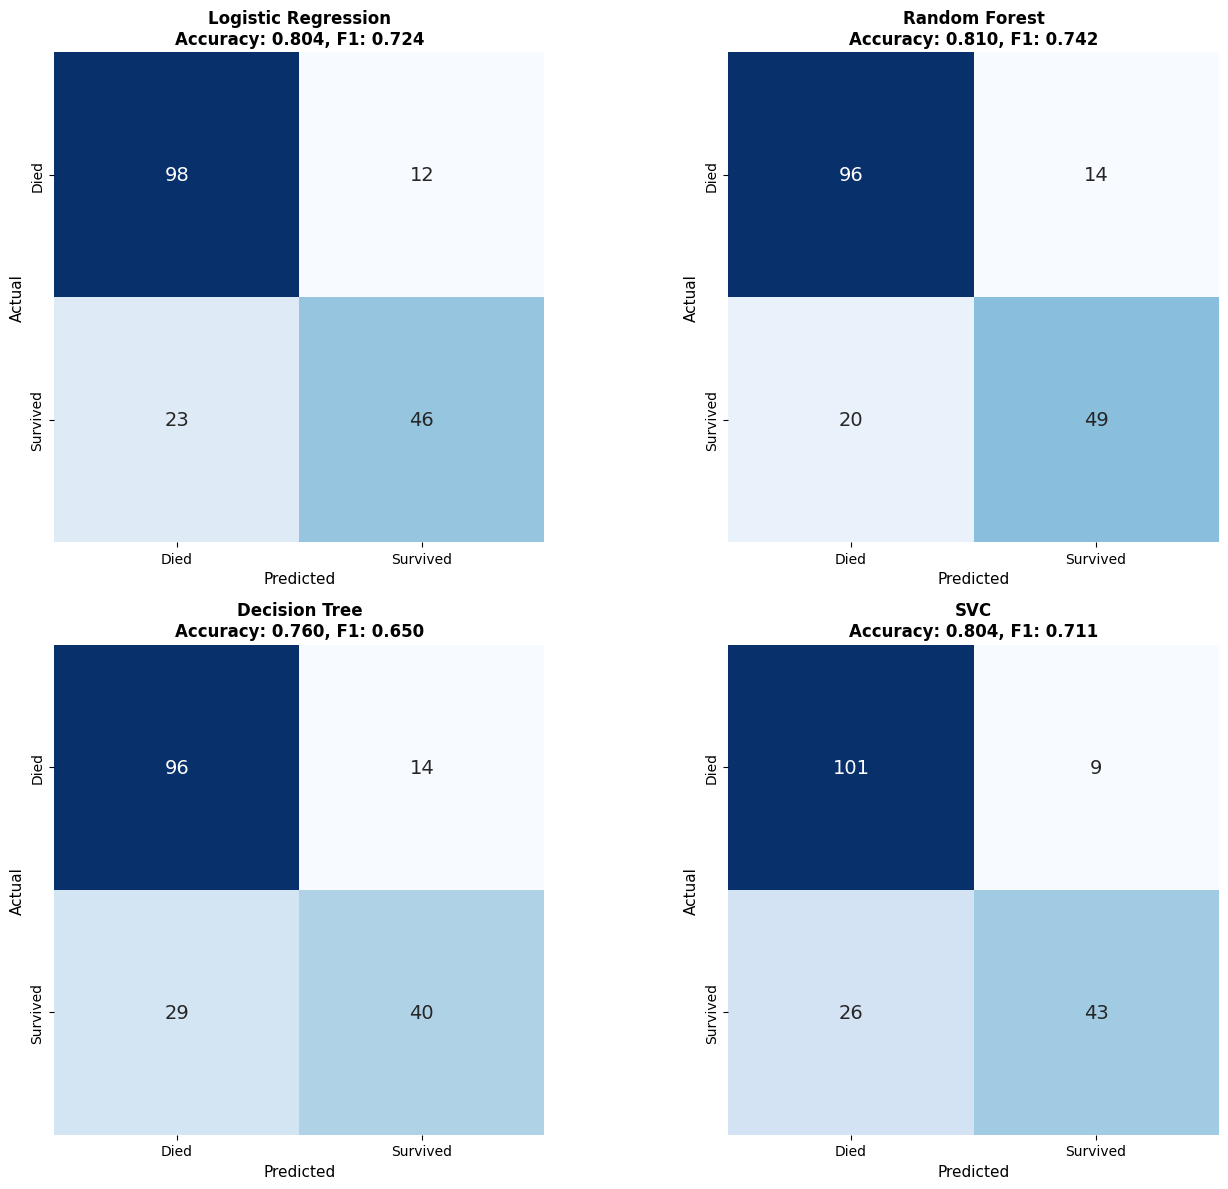

In [22]:
# Create confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar=False, square=True, annot_kws={'size': 14})
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}, F1: {result["f1_score"]:.3f}',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11)
    axes[idx].set_ylabel('Actual', fontsize=11)
    axes[idx].set_xticklabels(['Died', 'Survived'])
    axes[idx].set_yticklabels(['Died', 'Survived'])

plt.tight_layout()
plt.show()

Step 7: Detailed Analysis of Best Model


BEST MODEL: Random Forest

Detailed Classification Report:
              precision    recall  f1-score   support

Died       83.00%     87.00%     85.00%     110
Survived   78.00%     71.00%     74.00%     69

accuracy   81.00%
macro avg  80.00%     79.00%     80.00%     179
weighted avg 81.00%     81.00%     81.00%     179


Top 5 Most Important Features:
   Feature  Importance
       Sex    0.276767
      Fare    0.253087
       Age    0.236394
    Pclass    0.090967
FamilySize    0.052146


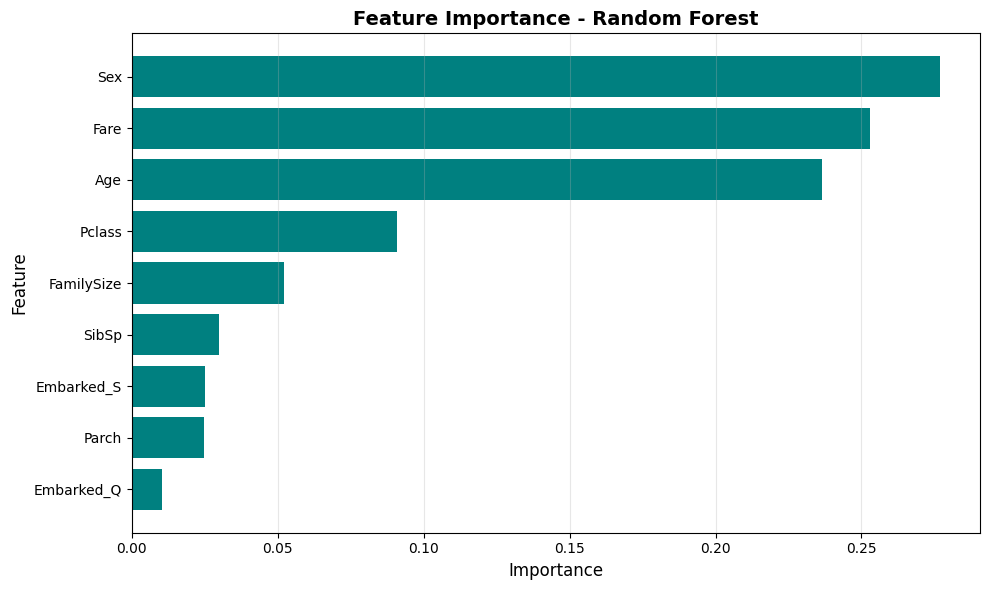

In [25]:
# Identify best model (by F1-score)
best_model_name = results_df.iloc[0]['Model']
best_model = results[best_model_name]['model']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*60}\n")

# Detailed classification report
print("Detailed Classification Report:")
report = classification_report(y_test, results[best_model_name]['predictions'],
                          target_names=['Died', 'Survived'])

# Format the report to display percentages
# Split the report into lines and process each line
report_lines = report.split('\n')
formatted_report = []
for line in report_lines:
    if line.strip():  # Process non-empty lines
        parts = line.split()
        if len(parts) >= 5 and parts[0] in ['Died', 'Survived']: # Handle class-specific lines
            class_name = parts[0]
            precision = float(parts[1])
            recall = float(parts[2])
            f1 = float(parts[3])
            support = parts[4]
            formatted_report.append(f"{class_name:<10} {precision:.2%}     {recall:.2%}     {f1:.2%}     {support}")
        elif len(parts) >= 3 and parts[0] in ['accuracy', 'macro', 'weighted']: # Handle summary lines
            if parts[0] == 'accuracy':
                accuracy_score_val = float(parts[1])
                formatted_report.append(f"{parts[0]:<10} {accuracy_score_val:.2%}")
            else:
                avg_name = parts[0] + ' ' + parts[1] # Combine 'macro'/'weighted' and 'avg'
                precision = float(parts[2])
                recall = float(parts[3])
                f1 = float(parts[4])
                support = parts[5] if len(parts) > 5 else '' # Handle potential missing support for weighted avg in older versions
                formatted_report.append(f"{avg_name:<10} {precision:.2%}     {recall:.2%}     {f1:.2%}     {support}")
        else:
             formatted_report.append(line) # Keep other lines as is (e.g., header)
    else:
        formatted_report.append(line) # Keep empty lines

print('\n'.join(formatted_report))


# Feature importance (if available)
if best_model_name in ['Random Forest', 'Decision Tree']:
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nTop 5 Most Important Features:")
    print(feature_importance.head().to_string(index=False))

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

Step 8: Hyperparameter Tuning (Advanced - Optional)

In [26]:
from sklearn.model_selection import GridSearchCV

# Example: Tune Random Forest (if it's the best model)
if best_model_name == 'Random Forest':
    print("\nTuning Random Forest hyperparameters...")

    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    }

    # Grid search with cross-validation
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    # Best parameters
    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best cross-validation F1-score: {grid_search.best_score_:.3f}")

    # Evaluate on test set
    tuned_pred = grid_search.best_estimator_.predict(X_test_scaled)
    tuned_f1 = f1_score(y_test, tuned_pred)

    print(f"Test F1-score (tuned): {tuned_f1:.3f}")
    print(f"Test F1-score (default): {results[best_model_name]['f1_score']:.3f}")
    print(f"Improvement: {(tuned_f1 - results[best_model_name]['f1_score']):.3f}")


Tuning Random Forest hyperparameters...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation F1-score: 0.758
Test F1-score (tuned): 0.714
Test F1-score (default): 0.742
Improvement: -0.028


Step 9: Model Comparison Summary

In [31]:
# Create a comprehensive summary
print("\n" + "="*70)
print("SUMMARY: MODEL SELECTION GUIDE")
print("="*70)

for name, result in results.items():
    print(f"\n{name}:")
    print(f"  Performance: Accuracy={result['accuracy']:.2%}, F1={result['f1_score']:.2%}")

    if name == 'Logistic Regression':
        print(" Pros: Fast, interpretable, shows feature coefficients")
        print(" Cons: Assumes linear relationships")
        print(" Use when: You need to explain to non-technical stakeholders")

    elif name == 'Random Forest':
        print(" Pros: Best accuracy, handles non-linearity, feature importance")
        print(" Cons: Slower, harder to interpret individual trees")
        print(" Use when: Accuracy is top priority, you have compute resources")

    elif name == 'Decision Tree':
        print(" Pros: Extremely interpretable, fast, can visualize")
        print(" Cons: Overfits easily, unstable")
        print(" Use when: You need simple if-then rules")

    elif name == 'SVC':
        print(" Pros: Works well with high-dimensional data")
        print(" Cons: Slow, requires scaling, hard to interpret")
        print(" Use when: You have complex boundaries, smaller datasets")

print("\n" + "="*70)
print(f"WINNER: {best_model_name}")
print(f"   F1-Score: {results[best_model_name]['f1_score']:.2%}")
print("="*70)


SUMMARY: MODEL SELECTION GUIDE

Logistic Regression:
  Performance: Accuracy=80.45%, F1=72.44%
 Pros: Fast, interpretable, shows feature coefficients
 Cons: Assumes linear relationships
 Use when: You need to explain to non-technical stakeholders

Random Forest:
  Performance: Accuracy=81.01%, F1=74.24%
 Pros: Best accuracy, handles non-linearity, feature importance
 Cons: Slower, harder to interpret individual trees
 Use when: Accuracy is top priority, you have compute resources

Decision Tree:
  Performance: Accuracy=75.98%, F1=65.04%
 Pros: Extremely interpretable, fast, can visualize
 Cons: Overfits easily, unstable
 Use when: You need simple if-then rules

SVC:
  Performance: Accuracy=80.45%, F1=71.07%
 Pros: Works well with high-dimensional data
 Cons: Slow, requires scaling, hard to interpret
 Use when: You have complex boundaries, smaller datasets

WINNER: Random Forest
   F1-Score: 74.24%


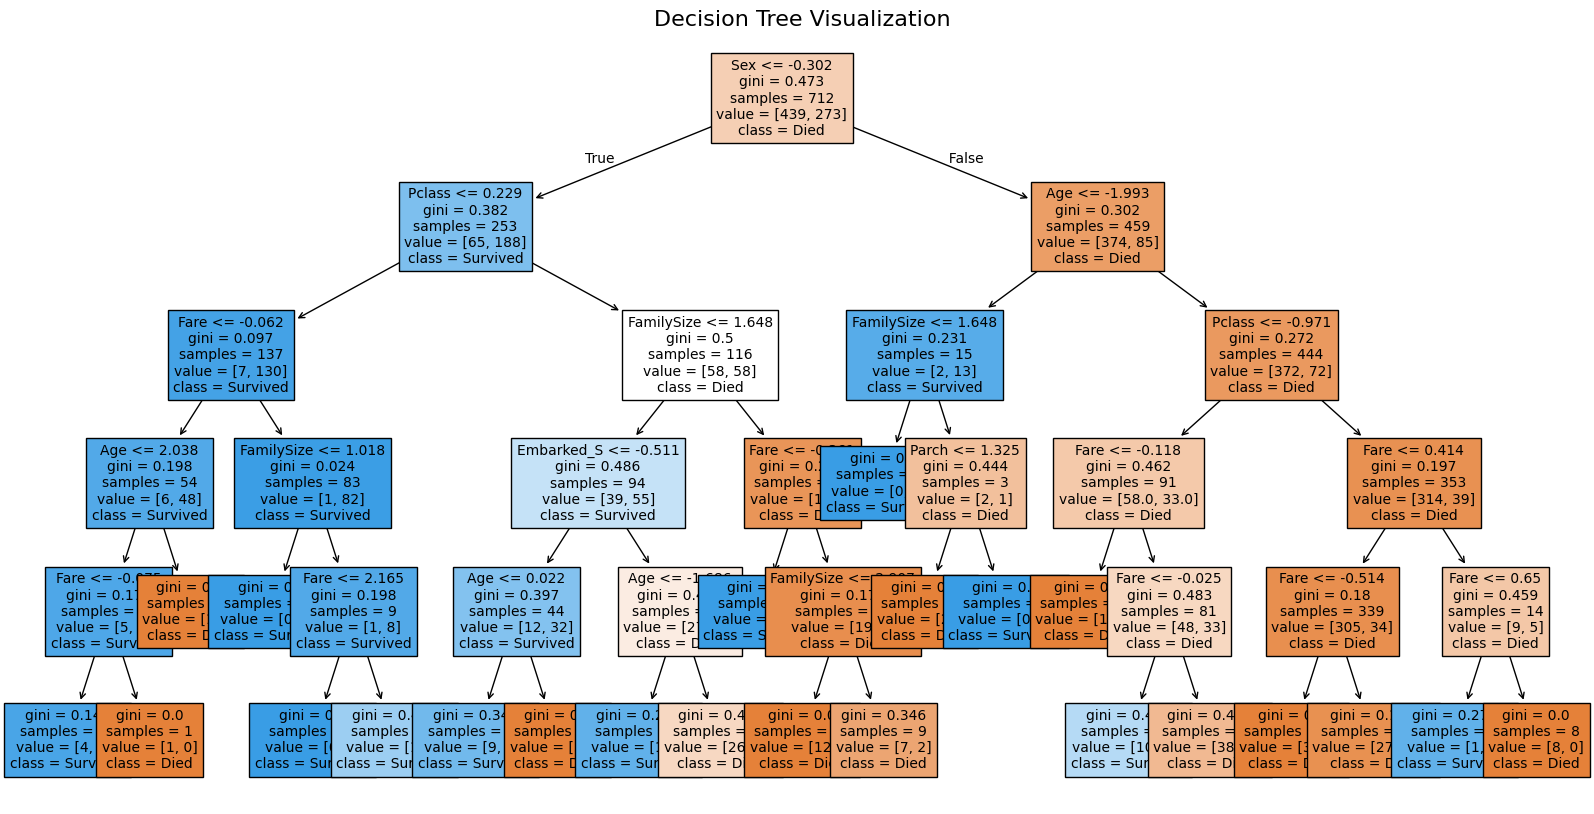

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(results['Decision Tree']['model'],
          feature_names=features,
          class_names=['Died', 'Survived'],
          filled=True,
          fontsize=10)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()